#Scrape data from openweathermap using api

###Import required libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta
import json
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

###Print temparature, humidity and weather descripton etc.

In [19]:
#OpenWeatherMap API key

from google.colab import userdata
api_key = userdata.get('openweather')


# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(city):
    #url = f'http://api.openweathermap.org/data/2.5/forecast?id={city}&appid={api_key}'
    url = f'http://api.openweathermap.org/data/2.5/forecast?zip={zip_code}&cnt=5&appid={api_key}'
    response = requests.get(url)
    data = json.loads(response.text)
    return data

# Get weather data for a specific city
city = '4161438'
zip_code = '33805'
data = fetch_weather_data(zip_code)


# Extract desired information
for weather_data in data['list']:
    dt_txt = weather_data['dt_txt']
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    description = weather_data['weather'][0]['description']
    print(f"Date and Time: {dt_txt}")
    print(f"Temperature: {temperature} K")
    print(f"Description: {description}")
    print()

Date and Time: 2024-09-13 18:00:00
Temperature: 305.78 K
Description: light rain

Date and Time: 2024-09-13 21:00:00
Temperature: 304.65 K
Description: overcast clouds

Date and Time: 2024-09-14 00:00:00
Temperature: 301.5 K
Description: overcast clouds

Date and Time: 2024-09-14 03:00:00
Temperature: 298.75 K
Description: overcast clouds

Date and Time: 2024-09-14 06:00:00
Temperature: 298.67 K
Description: light rain



###Create a dataframe and print

In [20]:
import json
import requests
import json
import pandas as pd

from google.colab import userdata
api_key = userdata.get('openweather')


# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(zip_code):
    #url = f'http://api.openweathermap.org/data/2.5/forecast?id={city}&appid={api_key}'
    url = f'http://api.openweathermap.org/data/2.5/forecast?zip={zip_code}&appid={api_key}'
    response = requests.get(url)
    data = json.loads(response.text)
    return data

# Get weather data for a specific city
city = '4161438'
zip_code = '33805'
data = fetch_weather_data(zip_code)

# Extract relevant data and create a list of dictionaries
weather_data = []
for item in data['list']:
    weather_data.append({
        'Date and Time': item['dt_txt'],
        'Temperature': item['main']['temp'],
        'Humidity': item['main']['humidity'],
        'Description': item['weather'][0]['description']
    })

# Create a pandas DataFrame
df = pd.DataFrame(weather_data)

# Print the DataFrame
print(df)

          Date and Time  Temperature  Humidity       Description
0   2024-09-13 18:00:00       305.78        69        light rain
1   2024-09-13 21:00:00       304.65        69   overcast clouds
2   2024-09-14 00:00:00       301.50        72   overcast clouds
3   2024-09-14 03:00:00       298.75        73   overcast clouds
4   2024-09-14 06:00:00       298.67        81        light rain
5   2024-09-14 09:00:00       297.91        87  scattered clouds
6   2024-09-14 12:00:00       298.36        86        light rain
7   2024-09-14 15:00:00       303.53        65        light rain
8   2024-09-14 18:00:00       304.61        59     moderate rain
9   2024-09-14 21:00:00       303.71        62     moderate rain
10  2024-09-15 00:00:00       300.73        75        light rain
11  2024-09-15 03:00:00       298.73        84        light rain
12  2024-09-15 06:00:00       298.08        88        few clouds
13  2024-09-15 09:00:00       297.40        91  scattered clouds
14  2024-09-15 12:00:00  

In [21]:
# Add 9 more rows
for i in range(9):
    j = 39 + i
    #print(j)
    dt_txt = datetime.strptime(weather_data[j]['Date and Time'], '%Y-%m-%d %H:%M:%S')
    new_dt_txt = dt_txt + timedelta(hours=3)
    weather_data.append({
        'Date and Time': new_dt_txt.strftime('%Y-%m-%d %H:%M:%S'),
        'Temperature': weather_data[i]['Temperature'],
        'Humidity': weather_data[i]['Humidity'],
        'Description': weather_data[i]['Description']
    })

# Create a pandas DataFrame
df = pd.DataFrame(weather_data)

# Print the DataFrame
print(df)


          Date and Time  Temperature  Humidity       Description
0   2024-09-13 18:00:00       305.78        69        light rain
1   2024-09-13 21:00:00       304.65        69   overcast clouds
2   2024-09-14 00:00:00       301.50        72   overcast clouds
3   2024-09-14 03:00:00       298.75        73   overcast clouds
4   2024-09-14 06:00:00       298.67        81        light rain
5   2024-09-14 09:00:00       297.91        87  scattered clouds
6   2024-09-14 12:00:00       298.36        86        light rain
7   2024-09-14 15:00:00       303.53        65        light rain
8   2024-09-14 18:00:00       304.61        59     moderate rain
9   2024-09-14 21:00:00       303.71        62     moderate rain
10  2024-09-15 00:00:00       300.73        75        light rain
11  2024-09-15 03:00:00       298.73        84        light rain
12  2024-09-15 06:00:00       298.08        88        few clouds
13  2024-09-15 09:00:00       297.40        91  scattered clouds
14  2024-09-15 12:00:00  

In [22]:
df.to_csv('/content/sample_data/output.csv', index=False)

###Basic Data Exploration:

In [23]:
# Get summary statistics
print(df.describe())

# Check data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

       Temperature   Humidity
count    49.000000  49.000000
mean    300.512041  75.489796
std       3.062747  11.948017
min     296.280000  51.000000
25%     297.910000  66.000000
50%     298.910000  74.000000
75%     303.530000  86.000000
max     305.780000  93.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  49 non-null     object 
 1   Temperature    49 non-null     float64
 2   Humidity       49 non-null     int64  
 3   Description    49 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB
None
Date and Time    0
Temperature      0
Humidity         0
Description      0
dtype: int64


###Univariate Analysis:

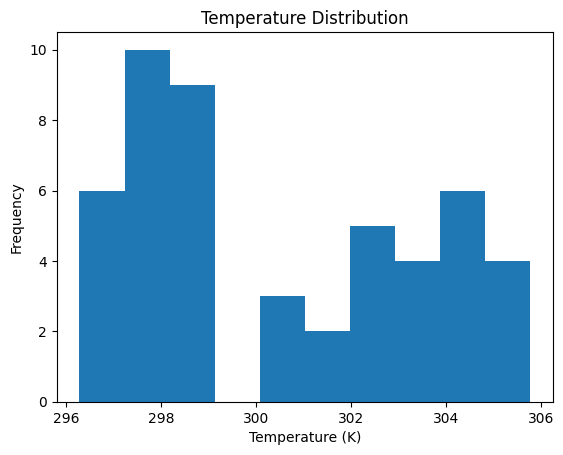

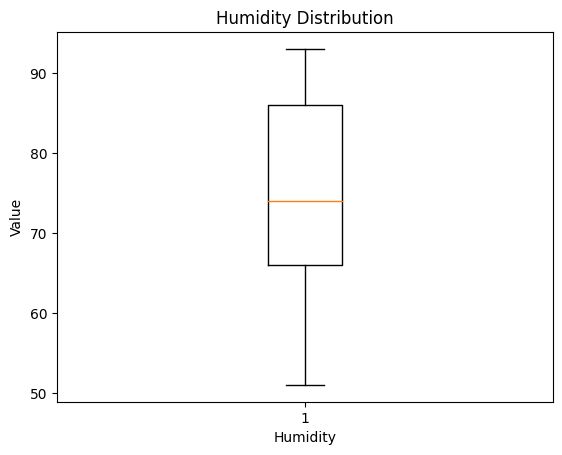

In [24]:
# Histogram of temperature
plt.hist(df['Temperature'])
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

# Box plot of humidity
plt.boxplot(df['Humidity'])
plt.xlabel('Humidity')
plt.ylabel('Value')
plt.title('Humidity Distribution')
plt.show()

###Bivariate Analysis:

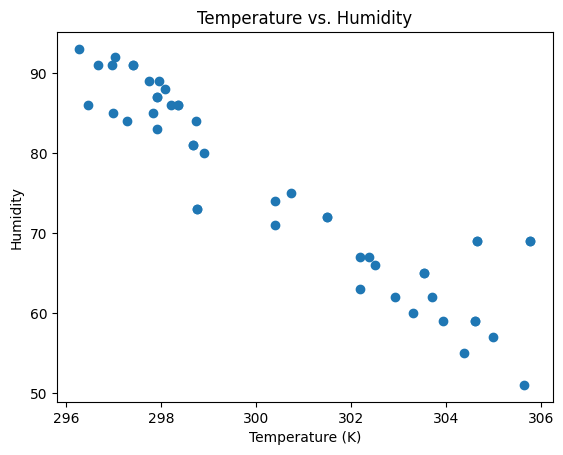

             Temperature  Humidity
Temperature     1.000000 -0.920324
Humidity       -0.920324  1.000000


In [25]:
# Scatter plot of temperature vs. humidity
plt.scatter(df['Temperature'], df['Humidity'])
plt.xlabel('Temperature (K)')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.show()

# Correlation matrix
correlation_matrix = df[['Temperature', 'Humidity']].corr()
print(correlation_matrix)

###Set dt_txt as the index:

In [26]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date and Time', inplace=True)

###Time Series Decomposition:

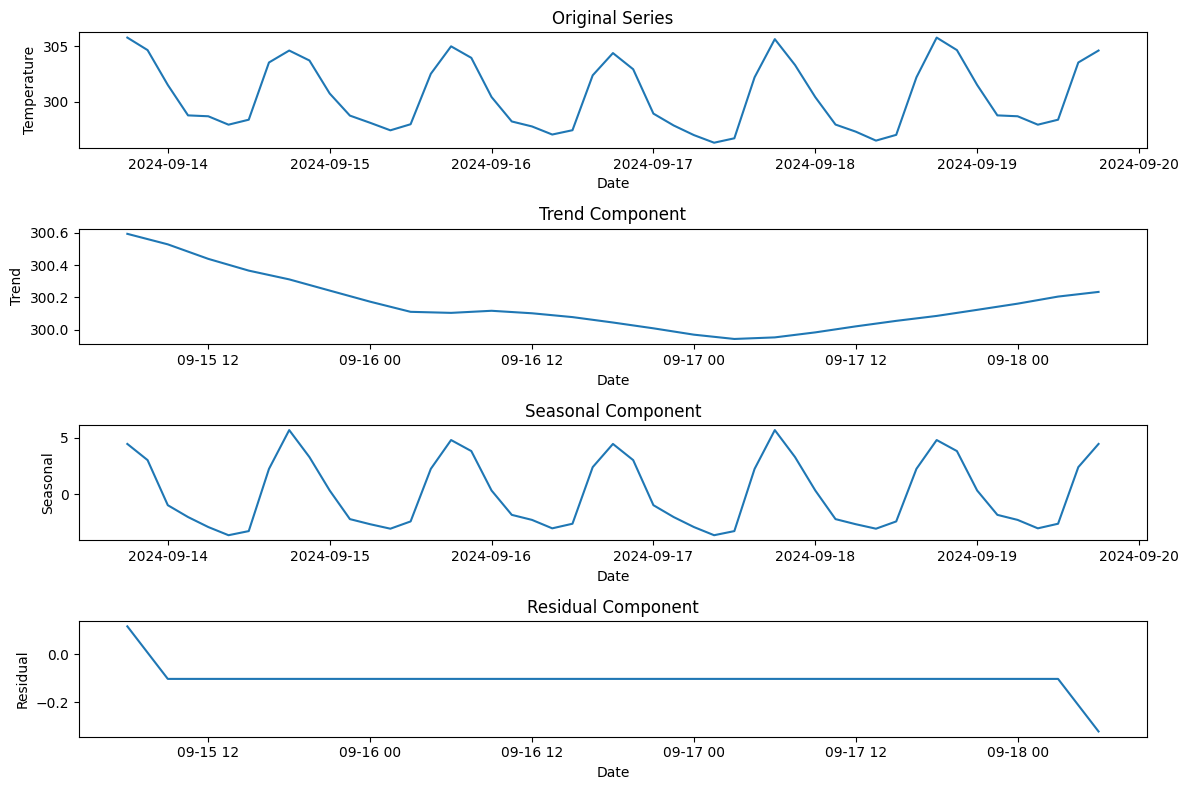

In [27]:
decomposition = seasonal_decompose(df['Temperature'], model='additive')

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original Series')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

###Stationarity Check:

In [28]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Temperature'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.3945081710010145
p-value: 0.5849061200426753
Critical Values: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}


###Stationary Transformation (if necessary):

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Assign values to p, d, and q
p = 1 # Example value
d = 0 # Example value
q = 1 # Example value


model = ARIMA(df['Temperature'], order=(p, d, q))  # Adjust p, d, q parameters
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                   49
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -99.241
Date:                Fri, 13 Sep 2024   AIC                            206.481
Time:                        17:57:17   BIC                            214.049
Sample:                    09-13-2024   HQIC                           209.352
                         - 09-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.7239      1.097    274.236      0.000     298.575     302.873
ar.L1          0.4884      0.224      2.183      0.029       0.050       0.927
ma.L1          0.7024      0.158      4.444      0.0

###Forecasting:

In [30]:
forecast = results.forecast(steps=10)  # Forecast for the next 10 periods
print(forecast)

2024-09-19 21:00:00    302.526010
2024-09-20 00:00:00    301.604011
2024-09-20 03:00:00    301.153734
2024-09-20 06:00:00    300.933833
2024-09-20 09:00:00    300.826440
2024-09-20 12:00:00    300.773992
2024-09-20 15:00:00    300.748379
2024-09-20 18:00:00    300.735870
2024-09-20 21:00:00    300.729761
2024-09-21 00:00:00    300.726777
Freq: 3H, Name: predicted_mean, dtype: float64


**Remember to adjust the parameters (p, d, q) in the ARIMA model based on your data and analysis.** You may also need to explore other time series models like SARIMA or Prophet, especially if your data exhibits seasonality or trend.

**Additional considerations:**

**Outlier detection and handling:** If your data contains outliers, consider removing or handling them before modeling.
**Feature engineering:** Create additional features based on the time series data (e.g., lagged variables, moving averages) to improve model performance.
**Model evaluation:** Use appropriate metrics like mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE) to evaluate the model's accuracy.

###Categorical Analysis on Weather Description

The description column contains categorical values representing different weather conditions.

Description
light rain          21
overcast clouds     10
scattered clouds     5
clear sky            4
moderate rain        3
few clouds           3
broken clouds        3
Name: count, dtype: int64


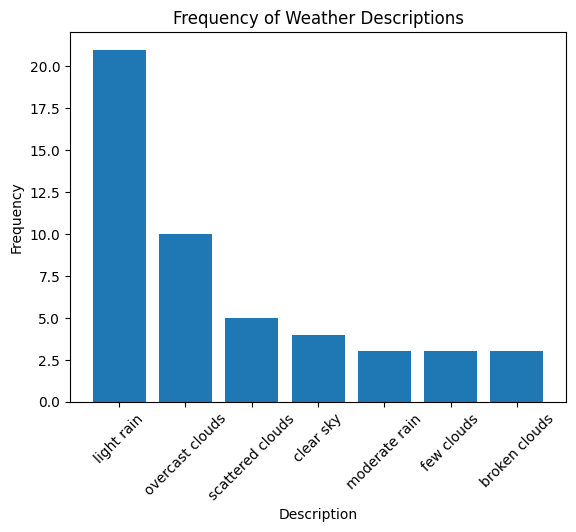

In [31]:
# Count the occurrences of each weather description
description_counts = df['Description'].value_counts()

# Print the results
print(description_counts)

# Bar plot of frequency
plt.bar(description_counts.index, description_counts.values)
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Descriptions')
plt.xticks(rotation=45)
plt.show()

###Cross-Tabulation with Other Variables:

Temperature       296.28  296.47  296.68  296.97  296.99  ...  304.61  304.65  304.99  305.64  305.78
Description                                               ...                                        
broken clouds          0       0       0       0       0  ...       0       0       0       0       0
clear sky              0       1       1       0       1  ...       0       0       0       0       0
few clouds             1       0       0       0       0  ...       0       0       0       0       0
light rain             0       0       0       0       0  ...       0       0       1       1       2
moderate rain          0       0       0       0       0  ...       2       0       0       0       0
overcast clouds        0       0       0       1       0  ...       0       2       0       0       0
scattered clouds       0       0       0       0       0  ...       0       0       0       0       0

[7 rows x 39 columns]


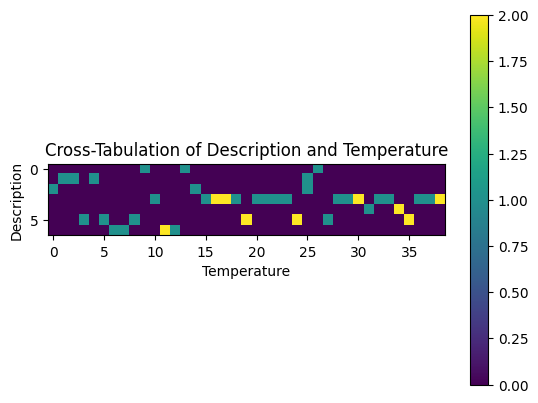

In [32]:
# Cross-tabulate weather description with temperature
cross_tab = pd.crosstab(df['Description'], df['Temperature'])
print(cross_tab)

# Heatmap of the cross-tabulation
plt.imshow(cross_tab, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Temperature')
plt.ylabel('Description')
plt.title('Cross-Tabulation of Description and Temperature')
plt.show()

###Chi-Square Test:

In [33]:
from scipy.stats import chi2_contingency

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(cross_tab)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

Chi-Square Statistic: 279.70833333333337
P-value: 0.011009512273959498


###One-Hot Encoding for Categorical Variables

**One-hot encoding **is a technique used to represent categorical data as numerical values that can be used by machine learning algorithms. It involves creating binary columns for each unique category, where 1 indicates the presence of the category and 0 indicates its absence.

In [34]:
# One-hot encode the 'weather_description' column

df_new = df[['Description']]
df_encoded = pd.get_dummies(df_new['Description'])

# Concatenate the encoded columns with the original DataFrame
df_final = pd.concat([df_new, df_encoded], axis=1)

#print(df_encoded.head())
#print(df_new.head())
#print(df.head())
#print(df_final.head())
pd.set_option('display.max_columns', 0)
print(df_final)

                          Description  broken clouds  ...  overcast clouds  scattered clouds
Date and Time                                         ...                                   
2024-09-13 18:00:00        light rain          False  ...            False             False
2024-09-13 21:00:00   overcast clouds          False  ...             True             False
2024-09-14 00:00:00   overcast clouds          False  ...             True             False
2024-09-14 03:00:00   overcast clouds          False  ...             True             False
2024-09-14 06:00:00        light rain          False  ...            False             False
2024-09-14 09:00:00  scattered clouds          False  ...            False              True
2024-09-14 12:00:00        light rain          False  ...            False             False
2024-09-14 15:00:00        light rain          False  ...            False             False
2024-09-14 18:00:00     moderate rain          False  ...            F